odict_keys(['bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'conv1.Ci', 'conv1.Cj', 'conv1.Ck1', 'conv1.Ck2', 'conv1.weight', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'conv2.Ci', 'conv2.Cj', 'conv2.Ck1', 'conv2.Ck2', 'conv2.weight', 'bn3.running_mean', 'bn3.running_var', 'bn3.num_batches_tracked', 'conv3.Ci', 'conv3.Cj', 'conv3.Ck1', 'conv3.Ck2', 'conv3.weight', 'classifier.Ci', 'classifier.Cj', 'classifier.weight'])


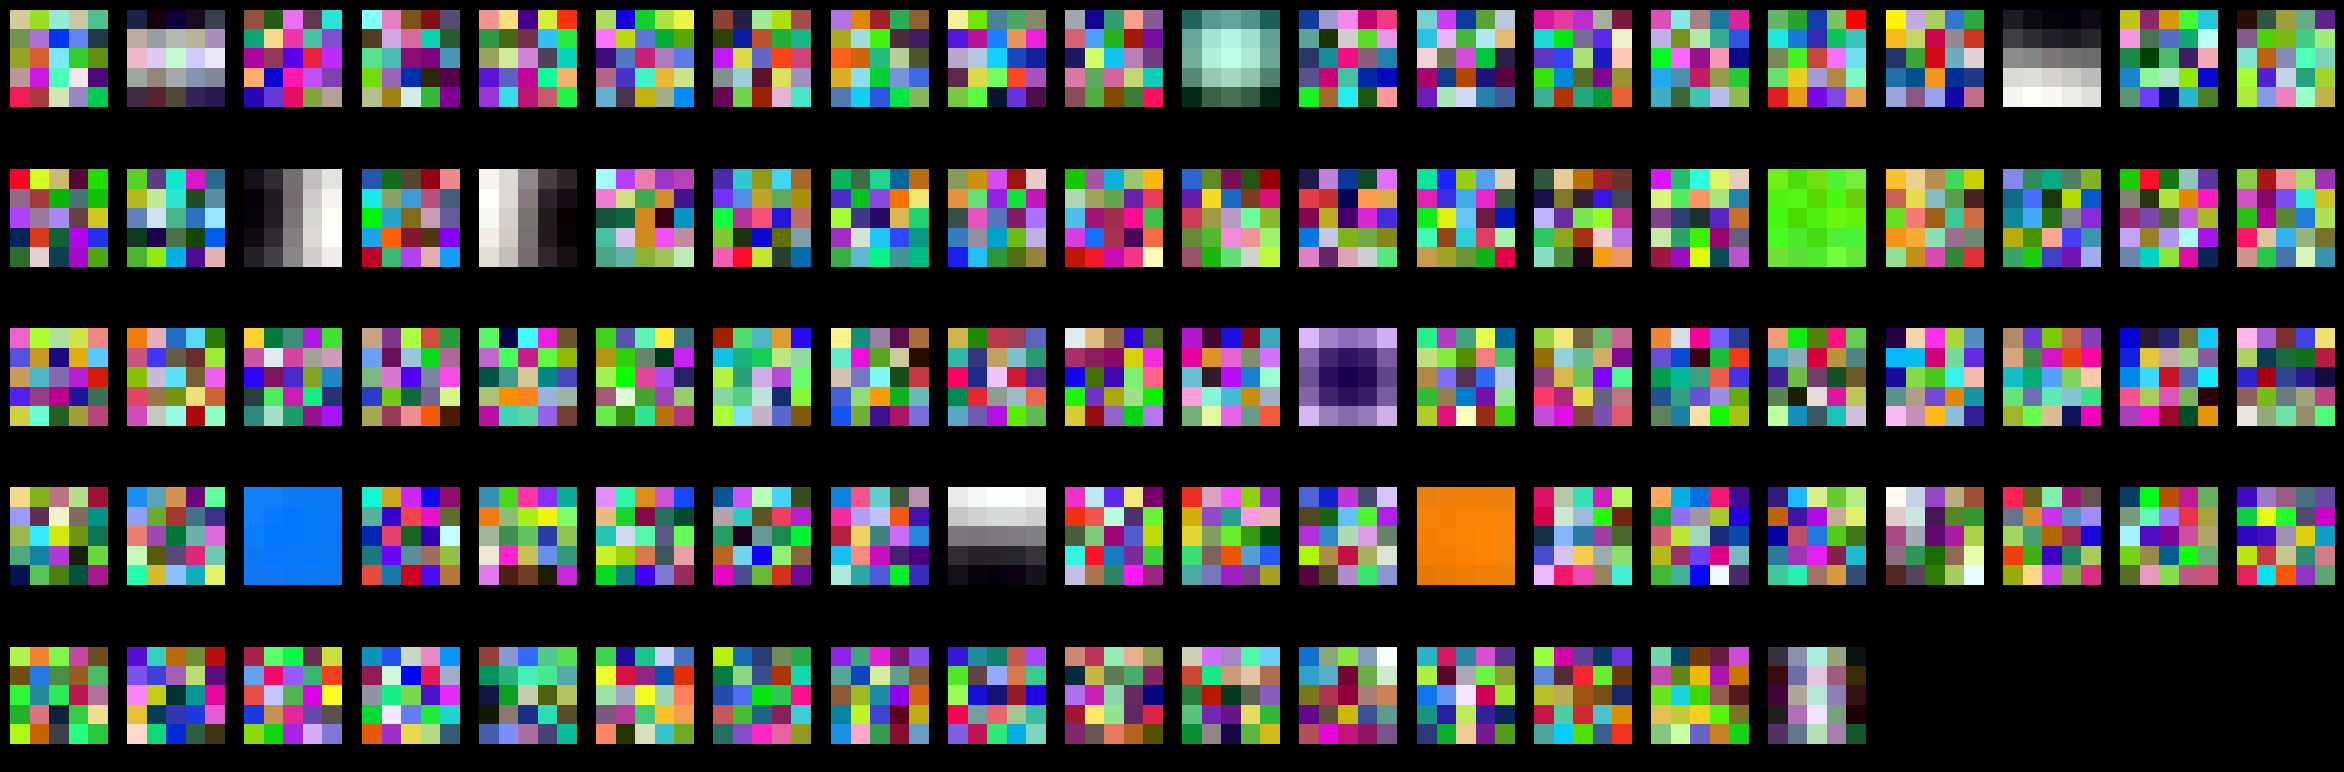

In [2]:
import torch
from model import DeepSoftHebb

model = DeepSoftHebb(device='cpu', in_channels=3, dropout=0.0, input_size=32)

# Load the model
state_dict = torch.load('best_model.pth', map_location='cpu')
model.load_state_dict(state_dict)

print(state_dict.keys())
# Print the model weights 

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 20, figsize=(30, 10))
# set black background  
fig.patch.set_facecolor('black')

count = 0
for i in range(5):
    for j in range(20):
        axes[i, j].axis('off')
        if count >= 96:
            continue
        img = model.conv1.weight[count].detach().cpu().numpy().transpose(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())
        axes[i, j].imshow(img)
        count += 1
